# EXERCISE — Read SEG-Y with `obspy`

Before going any further, you might like to know, [What is SEG-Y?](http://www.agilegeoscience.com/blog/2014/3/26/what-is-seg-y.html). See also the articles in [SubSurfWiki](http://www.subsurfwiki.org/wiki/SEG_Y) and [Wikipedia](https://en.wikipedia.org/wiki/SEG_Y).

We'll use the [obspy](https://github.com/obspy/obspy) seismology library to read and write SEGY data.
    
Technical SEG-Y documentation:

* [SEG-Y Rev 1](http://seg.org/Portals/0/SEG/News%20and%20Resources/Technical%20Standards/seg_y_rev1.pdf)
* [SEG-Y Rev 2 proposal](https://www.dropbox.com/s/txrqsfuwo59fjea/SEG-Y%20Rev%202.0%20Draft%20August%202015.pdf?dl=0) and [draft repo](http://community.seg.org/web/technical-standards-committee/documents/-/document_library/view/6062543)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
filename = 

In [4]:
!ls -l ../data/*.sgy

-rw-rw-r-- 1 matt matt 3811416128 Jun 12  2015 ../data/3D_gathers_pstm_nmo_X1001.sgy
-rw-rw-r-- 1 matt matt     256732 Aug 27  2015 ../data/F3_very_small.sgy
-rw-rw-r-- 1 matt matt   48281760 Aug 28  2015 ../data/HUN00-ALT-01_STK.sgy
-rw-rw-r-- 1 matt matt     888000 Sep  6 13:01 ../data/Marmousi.sgy
-rw-rw-r-- 1 matt matt  359620364 Sep 12 13:23 ../data/Penobscot_0-1000ms.sgy
-rw-rw-r-- 1 matt matt  474438768 Aug 25  2015 ../data/Penobscot.sgy


## 2D data

In [5]:
filename = '../data/HUN00-ALT-01_STK.sgy'

In [6]:
from obspy.io.segy.segy import _read_segy
section = _read_segy(filename)

# OPTIONS
# headonly=True — only reads the header info, then you can index in on-the-fly.
# unpack_headers=True — slows you down here and isn't really required.

In [10]:
section.traces[34].

Trace sequence number within line: 35
2000 samples, dtype=float32, 1000.00 Hz

In [11]:
section.traces[34].data

array([  0.        ,   0.        ,   0.        , ..., -60.05393982,
       -62.37457275, -50.0696106 ], dtype=float32)

In [12]:
data = np.stack(t.data for t in section.traces)

In [14]:
data.size

11718000

In [15]:
data.shape

(5859, 2000)

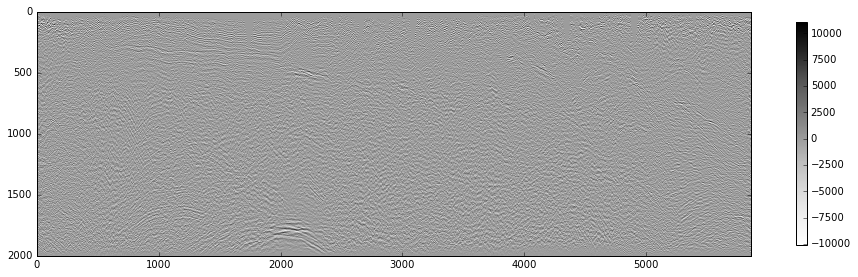

In [23]:
plt.figure(figsize=(16,8))
plt.imshow(data.T, cmap="Greys")
plt.colorbar(shrink=0.5)
plt.show()

### Q. What does `data.T` mean? Why do we do that?

In [26]:
data.shape

(5859, 2000)

### Q. How many samples are in a trace? How many traces are there?

In [29]:
section.traces[-1]

Trace sequence number within line: 5859
2000 samples, dtype=float32, 1000.00 Hz

Let's try to read the text header.

In [18]:
section.textual_file_header

b'C01  PROCESSED BY: VERITAS GEOSERVICES LTD.                                     C02  CLIENT      : HUNT OIL COMPANY                                             C03  AREA        : ALTON                                                        C04  LINE        : ALT-01                                                       C05  DATA   NOISE ATTENUATED STRUCTURE STACK                                    C06         (FILTERED/SCALED)                                                   C07                                                                             C08                                                                             C09  SAMPLE RATE   2 MS.                                                        C10  FIELD DATA LENGTH 3.0 SEC.; (PROCESSED TO 2.0 SEC)                         C11  PROCESSING SEQUENCE:                                                       C12  DEMULTIPLEX:SAMPLE RATE:1 MS RECORD LEN.:3 SEC.S                           C13  GEOMETRY                         

Aargh... 

OK, fine, we'll reformat this.

In [30]:
def chunk(string, width=80):
    lines = int(np.ceil(len(string) / width))
    result = ''
    for i in range(lines):
        line = string[i*width:i*width+width]
        result += line + (width-len(line))*' ' + '\n'
    return result

s = section.textual_file_header.decode()
print(chunk(s))

C01  PROCESSED BY: VERITAS GEOSERVICES LTD.                                     
C02  CLIENT      : HUNT OIL COMPANY                                             
C03  AREA        : ALTON                                                        
C04  LINE        : ALT-01                                                       
C05  DATA   NOISE ATTENUATED STRUCTURE STACK                                    
C06         (FILTERED/SCALED)                                                   
C07                                                                             
C08                                                                             
C09  SAMPLE RATE   2 MS.                                                        
C10  FIELD DATA LENGTH 3.0 SEC.; (PROCESSED TO 2.0 SEC)                         
C11  PROCESSING SEQUENCE:                                                       
C12  DEMULTIPLEX:SAMPLE RATE:1 MS RECORD LEN.:3 SEC.S                           
C13  GEOMETRY               

In [31]:
section.binary_file_header

Binary File Header:
	job_identification_number: 0
	line_number: 0
	reel_number: 0
	number_of_data_traces_per_ensemble: 1
	number_of_auxiliary_traces_per_ensemble: 0
	sample_interval_in_microseconds: 1000
	sample_interval_in_microseconds_of_original_field_recording: 1000
	number_of_samples_per_data_trace: 2000
	number_of_samples_per_data_trace_for_original_field_recording: 2000
	data_sample_format_code: 1
	ensemble_fold: 1
	trace_sorting_code: 4
	vertical_sum_code: 0
	sweep_frequency_at_start: 0
	sweep_frequency_at_end: 0
	sweep_length: 0
	sweep_type_code: 0
	trace_number_of_sweep_channel: 10
	sweep_trace_taper_length_in_ms_at_start: 0
	sweep_trace_taper_length_in_ms_at_end: 0
	taper_type: 0
	correlated_data_traces: 0
	binary_gain_recovered: 0
	amplitude_recovery_method: 0
	measurement_system: 1
	impulse_signal_polarity: 0
	vibratory_polarity_code: 0
	unassigned_1: b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\

### Q. Can you figure out how to read a trace header? (Hint: assign a variable name to one, then use IPython's tab completion or another Help trick.

In [36]:
section.traces[0].header

trace_sequence_number_within_line: 1
trace_sequence_number_within_segy_file: 1
original_field_record_number: 1
trace_number_within_the_original_field_record: 1
energy_source_point_number: 101000
ensemble_number: 1
trace_number_within_the_ensemble: 1
trace_identification_code: 2
number_of_vertically_summed_traces_yielding_this_trace: 0
number_of_horizontally_stacked_traces_yielding_this_trace: 0
data_use: 1
distance_from_center_of_the_source_point_to_the_center_of_the_receiver_group: 0
receiver_group_elevation: 0
surface_elevation_at_source: 0
source_depth_below_surface: 0
datum_elevation_at_receiver_group: 0
datum_elevation_at_source: 0
water_depth_at_source: 0
water_depth_at_group: 0
scalar_to_be_applied_to_all_elevations_and_depths: 0
scalar_to_be_applied_to_all_coordinates: -10
source_coordinate_x: 4838911
source_coordinate_y: 49950729
group_coordinate_x: 4838911
group_coordinate_y: 49950729
coordinate_units: 0
weathering_velocity: 0
subweathering_velocity: 0
uphole_time_at_source_i

In [37]:
section.traces[0].header.source_measurement_unit

0

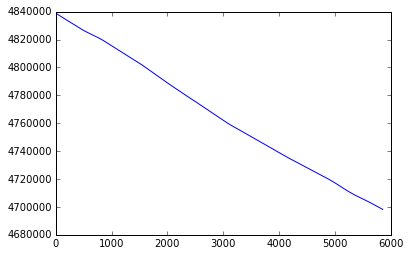

In [46]:
x_locs = []
for trace in section.traces:
    this_x = trace.header.source_coordinate_x
    x_locs.append(this_x)

plt.plot(x_locs)

In [77]:

locs = np.array([(t.header.source_coordinate_x, t.header.source_coordinate_y)
         for t in section.traces])


In [79]:
locs.T

array([[ 4838911,  4838886,  4838862, ...,  4698249,  4698227,  4698206],
       [49950729, 49950771, 49950814, ..., 50206138, 50206183, 50206228]])

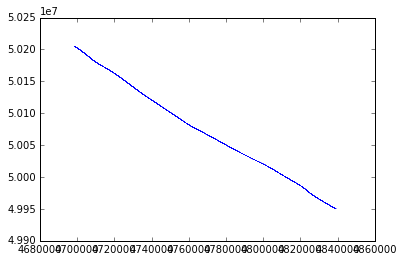

In [97]:
plt.scatter(*locs.T,
            s=1,
            linewidths=0, 
            alpha=0.5
           )

In [95]:
plt.scatter?

## 3D data

Let's move on to 3D data. 

It's only a little more complicated, because we'd usually like to shape the data into a volume.

Either use the small volume, or **[get the large dataset from Agile's S3 bucket](https://s3.amazonaws.com/agilegeo/Penobscot_0-1000ms.sgy.gz)**

In [98]:
#filename = '../data/F3_very_small.sgy'
filename = '../data/Penobscot_0-1000ms.sgy'

In [13]:
#filename = '../data/F3_very_small.sgy'
filename = '/home/grantste/Python_Course/data/Penobscot_0-1000ms.sgy'

### Q. Use the same method as before to load the data and 'stack' into a 2D panel.

In [99]:
from obspy.io.segy.segy import _read_segy
section = _read_segy(filename)

In [100]:
data = np.stack(t.data for t in section.traces)

### Q. Find the shape of the data.

In [101]:
data.shape

(289081, 251)

### Q. Can you reshape the dataset into a 3D volume? You'll need to find out how many inlines or xlines it has.

In [102]:
help(data)

Help on ndarray object:

class ndarray(builtins.object)
 |  ndarray(shape, dtype=float, buffer=None, offset=0,
 |          strides=None, order=None)
 |  
 |  An array object represents a multidimensional, homogeneous array
 |  of fixed-size items.  An associated data-type object describes the
 |  format of each element in the array (its byte-order, how many bytes it
 |  occupies in memory, whether it is an integer, a floating point number,
 |  or something else, etc.)
 |  
 |  Arrays should be constructed using `array`, `zeros` or `empty` (refer
 |  to the See Also section below).  The parameters given here refer to
 |  a low-level method (`ndarray(...)`) for instantiating an array.
 |  
 |  For more information, refer to the `numpy` module and examine the
 |  the methods and attributes of an array.
 |  
 |  Parameters
 |  ----------
 |  (for the __new__ method; see Notes below)
 |  
 |  shape : tuple of ints
 |      Shape of created array.
 |  dtype : data-type, optional
 |      Any o

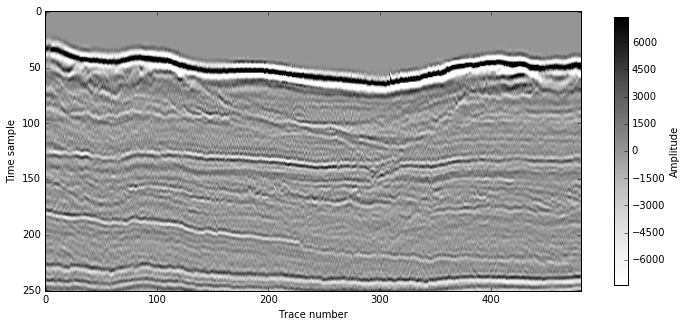

In [18]:
clip = np.percentile(seismic, 99)
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
plt.imshow(seismic[100,:,:].T, cmap="Greys", vmin=-clip, vmax=clip)
plt.colorbar(label="Amplitude", shrink=0.8)
ax.set_xlabel("Trace number")
ax.set_ylabel("Time sample")
plt.show()

### Q. Can you display a timeslice from the volume?

<hr />

<div>
<img src="https://avatars1.githubusercontent.com/u/1692321?s=50"><p style="text-align:center">© Agile Geoscience 2016</p>
</div>